# Section 1 - Building the model structure

When modeling biomedical systems, the “objects” of the model are organs, cells, and intra- and inter-cellular components (proteins, mRNAs, DNA, vesicles, protein aggregates, organelles, cytokines/chemokines and other signaling molecules; but also atoms forming the molecules, electrical charges on atoms, … etc). What defines the model, and makes it different from another model, is the choice of the “objects” we account for, and how the are related to each other, i.e. how they “interact”. The “interactions” can be any means by which one object affects one or several “features” of another object. Hence, what makes the model is: 

1) the objects we consider; 

2) the features of the objects we are interested in; 

3) how object features affect other features (interactions).

By representing the model objects and/or object features by nodes (e.g., one phosphorylatable protein can be represented as one node, or as several nodes representing the protein in different phosphorylation states), and interactions by edges, the entire model can be represented in its simplest form by a network. 

In biomedical sciences, networks can be huge. For instance, the regulation of the apoptotic process in human cells involves 1496 genes, including 2789 protein annotations, connected by tens of thousands of physical and genetic interactions. Thus, it is always wise to simplify the model, to strip it down to as few components as possible. This can be done somewhat “automatically”, in a systematic way, using Network Analysis tools, explained in https://github.com/oercompbiomed/CBM101/tree/master/D_Network_analysis, that allow to extract the central nodes or hub nodes separating (and connecting) distinct functional modules. 

But simplifying the model network or structure also requires a deep thinking of what is essential to the question we want to address, and the hypothesis(ses) we want to test. Mastering this step requires a lot of practice which will develop your modeling intuition. We recommend then you read as many model descriptions as possible in the available biomedical literature (the search “mathematical model” returns almost 2 million papers in pubmed https://pubmed.ncbi.nlm.nih.gov/?term=mathematical+model&sort=date&filter=journalcategory.medline), and analyze how the authors justify the model assumptions and ingredients. To give you some momentum, let’s have a look to some characteristic biological/biomedical examples.


## A) Preliminary lessons from model examples

The purpose of this section is to illustrate the variety of mathematical models found in (cell) biology and biomedicine, to analyze the rationale behind the choice of model objects/objects features/relationships that make them, and the various outputs that can be expected from them. 

### Network of interacting biomolecules: the example of glucose-regulated gene expression 
Let us first consider the glucose regulation of gene expression in yeast. The figure below summarizes the experimental knowledge on this cellular pathway (Figure 1, from https://doi.org/10.1186/1752-0509-3-7 ).

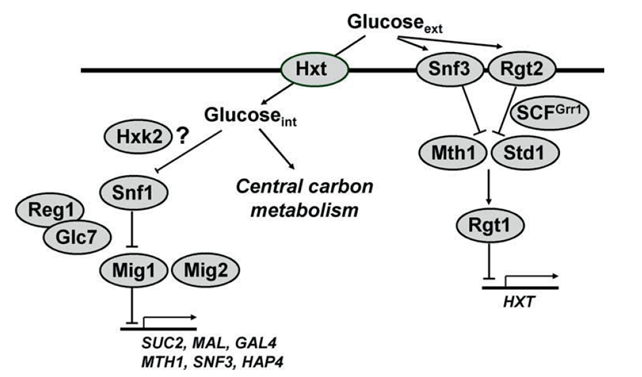

Briefly, "external glucose is sensed by two sensors located in the cell membrane, Rgt2 and Snf3. At high glucose levels, the signal from these sensors leads to SCFGrr1 mediated ubiquitination and consequent degradation of Mth1 and Std1, which are required for Rgt1 activation. 
External glucose is transported into the cell by hexose transporters with different affinities (HXT1-HXT16). Expression of HXT genes is under the repressive control of Rtg1", linking glucose import to glucose availability. "Inside the cell, glucose is phosphorylated to glucose 6-phosphate by Hxk2, therefore entering into carbon metabolism. An unknown signal triggered by high glucose levels leads to inactivation of the Snf1 complex. This inactivation is regulated by the protein phosphatase Glc7-Reg1. Inactive Snf1 cannot phosphorylate Mig1, which thus remains in the nucleus under high glucose levels, exerting repression of transcription of several genes", which include glucose sensors. "At low glucose concentrations, when Snf1 becomes active, Mig1 is phosphorylated and translocates to the cytosol, releasing repression." This achieves a second link between glucose import and glucose availability. The role of central carbon metabolism on both pathways is of course unknown. Below, we are asking different questions that involve this glucose pathway and we are trying to reduce this pathway to a minimal model to address the question.

Question 1: we make an experiment where we suddenly deplete external glucose, and we measure as a time-course internal glucose concentration (metabolomics) and Mig1 localization (Mig1-GFP construct for instance). Internal glucose will progressively deplete over time, and Mig1 will be exported from the nucleus to the cytosol given Figure 1. We want to model Mig1 nuclear export following depletion of external glucose in order to find which of internal glucose depletion or Mig1 export is the rate limiting step. What is the minimal model we can use? 

In [1]:
# %load solutionQuestion1.py

Basically: internal glucose makes nuclear Mig1. 
In this simplified model, the intracellular glucose concentration (which we measure) integrates all the effects of the pathway(s) downstream of glucose sensing (right part of Figure 1). Given that we are not interested in any feature of those proteins, this part of the glucose pathway can simply be ignored in our model. Similarly, Mig1 export (the drop of nuclear Mig1) integrates the roles of the kinase Snf1 and the phosphatase Reg1/Glc7 downstream of internal glucose. Hence, at first sight, with adequate parametrization of the "arrow" link, this model seems sufficient to address the question, and shall always be tried first.

Question 2: we want perform the same experiment in the presence of a phosphatase inhibitor. Can we use the same model?

In [2]:
# %load solutionQuestion2.py

If the two time-courses can be fitted well with this model, it tells that Mig1 nuclear export is simply downstream of internal glucose depletion. In particular it argues that Mig1 localization has no retroactive effects on internal glucose degradation. 
If this model does not faithfully reproduces the 2 time-courses in absence of phosphatase inhibitors, but does so in their presence, it suggests that Mig1 acts on internal glucose levels retroactively through the kinase/phosphatase network. This examplifies how comparing the predictions of overly simple models with slightly different structure can inform on the existence of biological interactions.  

Question 3: how should we modify the model if we want to get insight on the nuclear import of Mig1?

In [3]:
# %load solutionQuestion3.py

In [4]:
# %load solutionQuestion3explanation.py

Question 4: we now want to predict the change in glucose import efficiency (ratio of internal glucose to external pool), upon deletion of the RGT2 gene (one of the 2 glucose senser). Which (simplest) model should we use?

In [5]:
# %load solutionQuestion4.py

In [6]:
# %load solutionQuestion4explanation.py

### Importantly, the nodes and edges on the network representation of the models can have very different meanings depending on which object, or which object feature they affect.
But we will come back on this in the "Animating the structure" notebook. 

We hope you are now convinced that there is a great flexibility when it comes to choose the structure of a mathematical model, and as a modeler you have the (great) power to make this choice. But remember the Peter Parker principle, "With great power comes great responsibility", and the choice of model structure will strongly constrain 1) what you can reasonably expect from it and 2) to which extent you might be able to solve it, or in other words how likely you are to really get the answers you expected. As you can imagine, simple models will limit 1) and complex model will limit 2), and there will always be an optimal trade-off to reach. In the remainder of this notebook, we will go through many examples of model structures in various fields of biology and biomedicine, to get familiarized with the kind of ingredients models are made of, the different scales they encompass how they evolve with time and build on each other to progress the knowledge on a given system.

### Lipid vesicles trafficking: multiple scales from single atoms to whole cell polarity
Let's now have a look to a more complex example that involves different scales and object types: the modeling of the trafficking of lipid membrane vesicles between organelles, or even between cells. Lipid vesicles contain cellular material, termed "cargo", wrapped in a lipid membrane bilayer that ensures its separation from the outside. VEsicles are used by cells as a mean of intra- and inter-cellullar cargo transport. Their formation on lipid-membrane wrapped organelles (endoplasmic reticulum, Golgi apparatus, plasma membrane...etc), their coating with different lipid-associated proteins, loading of their cargo, their transport to destination, and eventual fusion and cargo release constitute the so-called secretory pathway, because cells use it to encapsulate and secrete proteins, mRNAs or other biological molecules in their immediate environment. Understanding vesicular trafficking is important in biomedicine, as many disease stem (or benefit) from defects in vesicular trafficking. This is for instance the case of arthrogryposis, cystic fibrosis and renal dysfunction, the Hermansky-Pudlak syndrome, or the Parkinson disease to name but a few, but defective vesicular trafficking seems to also play a role in cancer, autophagy, type II Diabetes, Alzheimer's disease and other neurological disorders. Indeed, nerve terminals must carefully orchestrate vesicle trafficking steps to regulate neurotransmission. Secretory pathways are also hijacked by viral infections. 
For additional information on the mechanisms of vesicular trafficking, we encourage you watching these online lectures by the 2013 Nobel recipient Randy Schekman (UC Berkeley) on vesicular trafficking https://www.ibiology.org/sessions/session-4-vesicle-trafficking/. Since it is a very complex and intricate pathway, our understanding of it should benefit from mathematical modeling. 
We want to mathematically model lipid vesicle trafficking? First, let’s do our homework and dig the literature to see what is known from experiments. As shown below (Figure from https://doi.org/10.1016/S0092-8674(03)01079-1), vesicles connect most cell organelles through different circuits, often corresponding to different cargo and different coating proteins (COPI, COPII, Clathrins…).

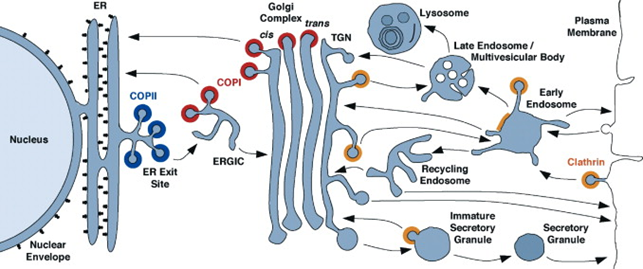


It gets even more complex if one looks close at the molecular details of the processes of vesicle formation, cargo loading, vesicle closure and scission, transport, tethering and fusion to the destination membrane (see below, Figure from https://doi.org/10.1016/S0092-8674(03)01079-1)

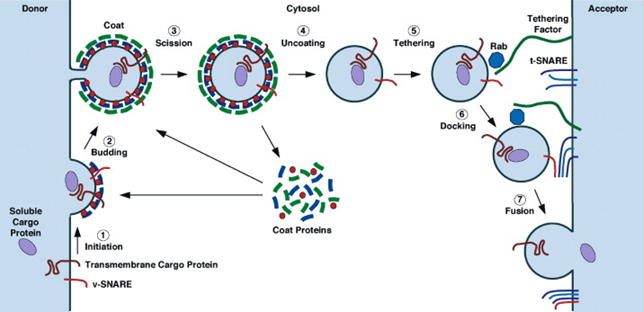

As you can easily guess, it gets even more complicated in cell-cell junctions where vesicles diffuse and are transported between the cells and fuse to another cell. A mathematical model of vesicle trafficking can represent this very complex pathways at many different scales: from the molecular structure of individual coating complexes, to reaction-diffusion dynamics of coat- and cargo proteins, to the transport of individual vesicles modulated by hundreds of proteins, up to the global functioning of a neuronal network in our brains. It is impossible, and would be certainly useless, to model the entire system using the quantum physics framework that is required to model the molecular structure of individual coating complexes. Rather, scientists are using diverse modeling scales, frameworks and strategies reflecting the particular questions they want to address. 

Let’s overview such strategies, and for each one of them, list model assumptions, objects and relationships between them, and what information was deduced from the model. 

At the smallest (space) scale in biological modeling, we find molecular dynamics simulations (MD). In MD, the model objects are all the atoms that make the lipid and protein macromolecules, the objects features the model deals with are the energetic states of these atoms, and the links between them are the (quantum) electromagnetic interactions between those atoms. Because those interactions form the basis of all interactions in the natural world, MD simulations are, in principle, the most “exact” modeling framework you could think of. However, their implementation is practically untractable to simulate the dynamics of more than a handful of molecules over more than hundreds of nanoseconds. Yet, MD is widely used to analyze the secretory pathway, in particular to study how the SNARE complex facilitates the fusion of a lipid vesicle to its destination (lipid) membrane. MD studies showed for instance that upon contact of two vesicles to fuse, a nanoscopic fusion pore forms and is stabilized by SNARE until full vesicle fusion is triggered, acting as a checkpoint.  Likewise, MD simulations revealed that oxidation of the SNARE complex by the Botulinum toxins triggers A and E was altering the complex conformation, leading to a dysfunctional SNARE complex, ultimately downregulating neurotransmitter release in synapses.  during oxidative stress.

Further reading: 

https://www.nature.com/articles/nature24469 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6294955/ 

https://www.embopress.org/doi/full/10.15252/embj.201899193 

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2920728/  …etc. 


At a slightly larger scale, coarse-grain molecular dynamics models are used to explain how different membrane-binding proteins (e.g., coat proteins) contribute to the generation of membrane curvature that 1) is not “natural” to the cell as it costs energy and 2) is essential for the budding and eventual formation of a lipid vesicle. As nicely shown on the Figure below (from https://dx.doi.org/10.3390%2Fpolym5030890), those models do account for several molecules present on a (small) patch of membrane (lipids, coat proteins) with their own quantum characteristics and interactions, and integrates submicron length-scales and submicrosecond time-scales, extending the predictive power of all-atom molecular dynamics models. Here, model objects are still atoms that constitute the lipid and protein macromolecules, but the relationship between model objects are attractive and repulsive force fields that act within the modeled membrane. 

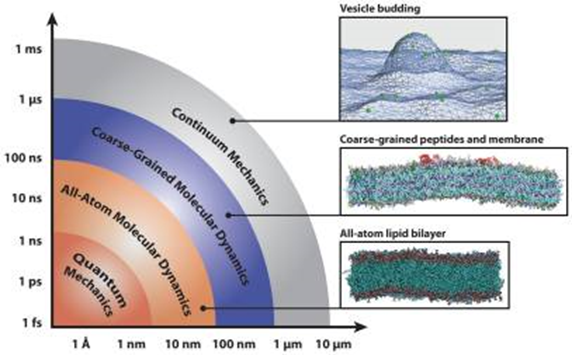

Those models accurately predict the physical energy cost of different membrane morphologies and maps out the free energy changes associated with membrane remodeling due to varying coat sizes, coat curvature strengths, membrane bending rigidities, and tensions. They identified how different coat proteins contribute to this energy expense, revealing e.g. that the PIP2 phospholipid is critical for stable binding of proteins essential for curvature induction, and also identified the critical size and curvature strength of a clathrin coat required for nucleation and stabilization of a mature vesicle.

Generally speaking, molecular dynamics models provide reasonable values for microscopic parameters, such that interaction strength, complex stability and binding-unbinding rates, vesicle budding rates, effects of post-translational modifications on molecular activities  … that can be used to feed other models at larger scales. MD models are not in the scope of this course, but yet, it’s good to know they exist!

Zooming out a bit, we find models of dynamically interacting biochemical reaction networks (e.g., mass-action kinetics-based models).  The objects of these models are biomolecules that move throughout the system studied (or parts of it). The object features can be any feature of a biomolecule: number/concentration, activity towards a substrate, post-translational modification, binding affinities… And the links between these features are not anymore real-time quantum interaction, but rather average, effective relationships (e.g. molecule A binds molecule B with binding rate $k_{on}$). 

Such models that build up on known molecular interactions (from experiments, or MD simulations) to predict how interacting biomolecular systems behave collectively: their predictions are biological functions or mechanisms, rather than microscopic parameters like in MD. 
For instance, as briefly stated above, vesicle secretion heavily depends on the amount and dynamics of critical phospholipids, most of which are phosphatidylinositol (PI) phospho-forms, termed “PIPs”, like PIP2. Lipid phosphorylation is controlled by a highly interacting network of lipid and protein signaling, as modeled in https://doi.org/10.1038/s41598-018-22226-8 (see Figure below).  

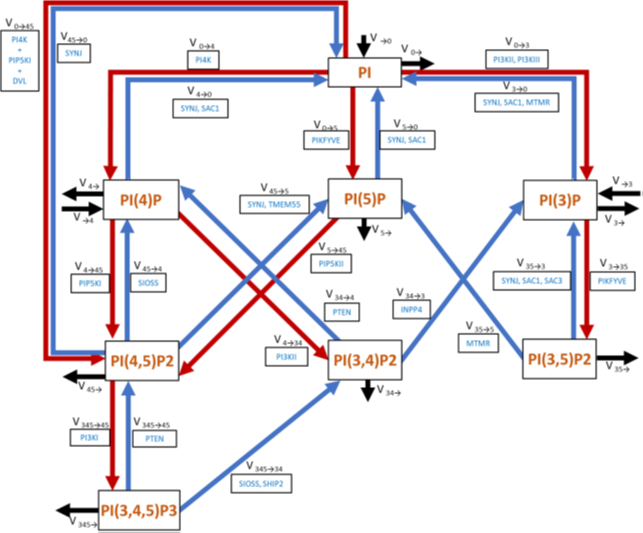

This model was simulated on a patch of membrane, and linked the activity of an almost exhaustive list of PIP regulators (indicated in blue, within black frames, like PI3 kinase, PTEN…) to the relative concentration of the different PIPs on the patch of membrane (in red, framed in black). Sensitivity analysis revealed which of the regulators are key in controlling the levels of each particular PIP, and also which ones have little effect. Hence, this model of PIP regulation provided insights to strip down PIP regulation to a minimal number of components in order to account for PIP signaling in higher-order vesicular trafficking models.  Note how this model ignores membrane bending, and membrane-associated proteins such as SNAREs: the focus is on phospholipids. 


Along the same lines, the dynamics of formation of an entire COPI vesicle was modeled at this scale in https://doi.org/10.1101/2020.09.06.285072 (see Figure below).

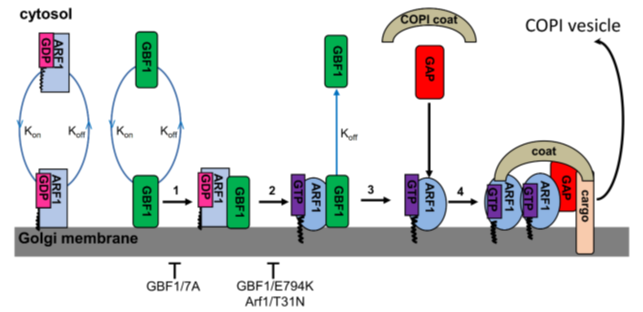

In short, the small GTPase Arf1 is activated by the GBF1 guanine nucleotide exchange factor GBF1 which promotes Arf1 loading with GTP. The ensuing conformational shift within Arf1 anchors it to the Golgi membrane, allowing further recruitment of the vesicle coat. This atomic-scale knowledge of the system was, though, insufficient to understand how a small number of Arf1 GTPases that continuously cycles between the Golgi membrane and the nearby cytosol was able to robustly coordinate vesicle coating. The analysis of the dynamical behavior of this model and the associated experiments revealed, among other network-scale properties, that the interaction with GBF1 is the key event that maintains Arf1 at the membrane, a major pre-requisite to vesicle formation. Note how, again in this example, membrane bending is ignored, and the formed vesicle is not really modeled: since the focus is on Arf1 and Gbf1 dynamics, it is sufficient to consider that the vesicle takes with it some Arf molecules, coat and cargo, is transported somewhere we don’t care, where the cargo is released and recycled to the system. 

There are of course mathematical models of the vesicular trafficking pathway where vesicles are explicitly modeled, and for a reason: the cargo they transport might be relevant to the biological process studied. This is for instance the case of a model of cellular polarity published about 10 years ago. Cell polarity is a process by which the cell concentrates its secretion to a specific point of its membrane, termed the pole. This pole suddenly becomes the destination of most vesicles secreted towards the outside of the cell (called exocytic vesicles), while vesicles that transit from the membrane to the cell interior (the endocytic vesicles) also tend to form preferentially in the polar region. Despite the molecular machinery that attracts the exocytic vesicles at the pole was known at this time (the “polarity factors”, e.g. the Cdc42 GTPase), it was unclear 1) how these molecules managed to remain concentrated on a small patch of plasma membrane despite of lateral diffusion, and 2) why the secretory apparatus was also able to self-organize in absence of several of the polarity factors. The problem was complicated by the fact that some polarity factors are part of the exocytic cargo.  
To address these questions, these authors had to design a model that included both exocytic vesicles and their cargo (see Figure below, from https://doi.org/10.1083/jcb.201206081), a network of biochemical reactions between polarity factors at the plasma membrane (similar to the Arf1 pathway shown above), also accounting for lateral diffusion, but also the formation of endocytic vesicles that remove proteins from the surface. However, the details of vesicles formation at the Golgi and of e.g. vesicle fusion were not included, since they were not key in controlling fluxes of polarity factors. In contrast, because they wanted to compare simulations of WT cells and mutants of the early endocytosis pathway that disrupt polarity, the different steps of endocytic vesicles maturations were described. 

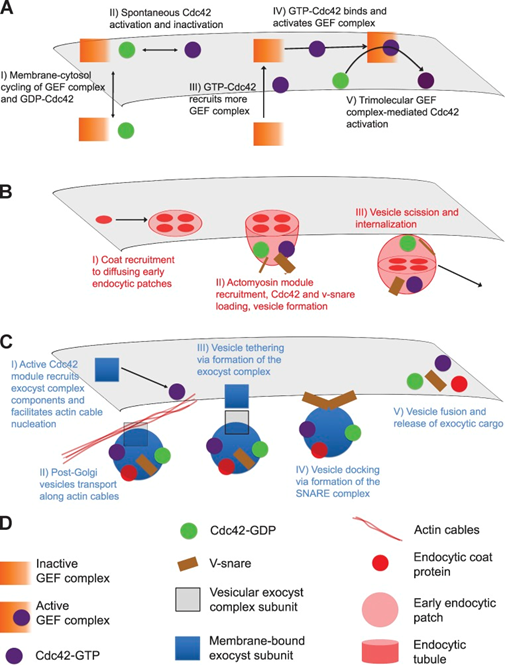

The analysis of this model revealed that polarity factors were sufficient, alone, to spontaneously form multiple pre-polar clusters where exocytic vesicles were re-directed. The model showed that these clusters were unstable because of lateral diffusion of the polarity factors. The association of endocytosis-rich regions around the clusters that the model predicted provided a way to recycle the diffusing factors and redistribute them, installing a competition between the pre-poles until a single pole survives. In this stable, final state, endocytic vesicles corral a central exocytic zone, tightening it to a robust, unique vertex. Such systems-level property of a biomolecular pathway is out of reach of both molecular dynamics simulations, or experimental work only. This model is significantly more complex than the PIP or Arf1 models. However, this complexity was required by the questions that were to be addressed.  

And finally, at a larger scale, there are models of the vesicle trafficking pathway that account for … almost only vesicles. A quick look at the introductory figure of this section is sufficient to realize that different organelles continuously exchange membrane vesicles in both directions. Yet, they manage to maintain very distinct compositions over time, with a segregation of particular coat proteins/SNARE proteins to particular organelles. “How can organelles communicate by bidirectional vesicle transport and yet maintain different protein compositions ?” This is the question Heinrich and Rapoport addressed using a simple yet elegant mathematical model (see Figure below, from https://dx.doi.org/10.1083%2Fjcb.200409087).

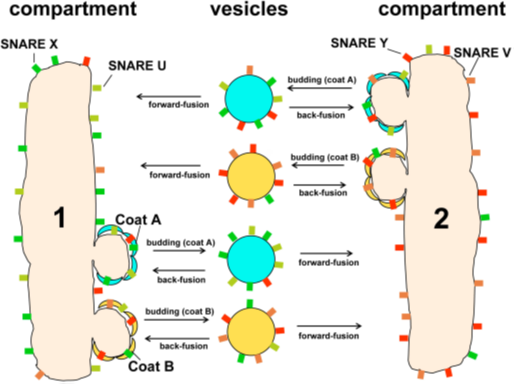

In their model, the objects are 2 compartments/organelles/membrane reservoirs, the vesicles, and the coat/SNARE proteins they transport. No biomolecular interactions, complex network topologies… Just 2 types of coats, and 4 types of SNARE proteins that pair 2 by 2. With the additional assumption that each coat preferentially packages certain SNAREs during vesicle budding, this model was sufficient to explain the stable segregation of coat and SNAREs in distinct compartments over time, also linking the compartment size to their molecular content. This model demonstrates that the qualitatively different nature of, e.g. the ER and the Golgi, could simply emerge from pairwise association of SNAREs and the higher affinity of each SNARE pair to a different coat protein. 

Models of synaptic transmission also often belong to this category of “coarse-grain” models, which integrate basic microscopic interactions into more global parameters to focus on large-scale mechanisms. If you are interested in neurosciences, we encourage you to go through the models reviewed in https://dx.doi.org/10.1016%2FB978-0-12-397897-4.00004-8 to analyze how the different model hypotheses and frameworks vary depending on the questions addressed.

These examples illustrate the variety of models that can be used to study the same mechanisms, depending on the particular focus of the question to address, and the different objects and features that these models manipulate. As we will see below, this variety is not limited to the secretory pathway!


### Modeling (on) an evolving spatial support : cell migration 
The models we have seen so far share one common feature: the spatial support in which they are considered is either undefined, or invariant. The latter includes the MD simulations where the size of a simulated membrane patch is specified by the number of lipid molecules accounted for in simulations, and the cell polarity model where the polarity factors diffuse on the surface of a sphere that represents the cell. All other models we’ve discussed do not explicitly consider that the biomolecules are moving in a somewhat limited space, and for the particular focus of these models, it was not an issue.  
However there is a broad range of biomedical problems where spatial constraints are critical, and must be modeled for. Then, the spatial support of the model becomes an object of the model, with its particular features and relationships to other objects. 

A particularly important instance of a biological problem where modeling space is a major requirement is the study of cell motion mechanisms. Understanding the mechanisms underlying cellular motion and migration is of course crucial in cancer and metastasis research, but not only. Cell migration also plays a central role in organ and tissue development, wound healing and immune response, …etc. 

Mammalian (adherent) cell motion can be (very) briefly summarized as follows: 
In response to extracellular cues, such that e.g. gradients in chemical attractors, repulsors, or mechanical constraints, the cells become polarized i.e. they acquire well-defined “front” and “rear” sides. Once polarized, cells protrude a lamellipodium at the leading edge of the “front” side, by locally reorganizing their actin cytoskeleton which generate a propulsive force. New adhesions are then established, anchoring the newly formed lamellipodium to the cell support, and aging adhesions (on the rear side) are released. Finally, the cell contracts to relieve the elongation that arose due to the protrusion, and given the front-to-back gradient in adhesion strength, the rear of the cell will move forward. The motion of one cell also affects the motion of nearby cells, by collective motion mechanisms that are still to determine. This summarized vision of cell motility is well represented by the cartoon picture below (from https://doi.org/10.1371/journal.pcbi.1008411):
 
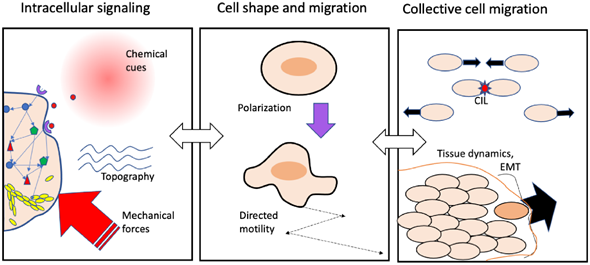



In motile cells, all these steps are performed simultaneously and are spatially and temporally coordinated by a very complex molecular machinery (see Figure below, from https://doi.org/10.1242/jcs.02662; a high resolution of the figure can be found in the article).

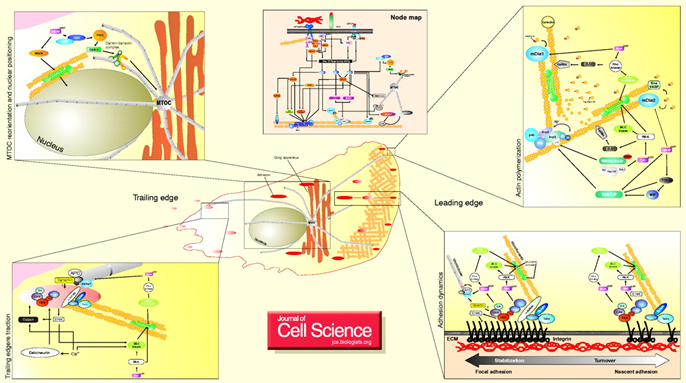

Additional details of all these pathways have characterized since this publication (2005), but this simplified - yet detailed - representation of the cell migration regulation has the advantage to emphasize on distinct aspects of the process that can be - and are often - modeled separately. 
Let’s have a look to the excellent review of mathematical models of cell migration, by Danuser and colleagues https://dx.doi.org/10.1146%2Fannurev-cellbio-101512-122308. Now that we are experts in multi-scale complex systems modeling, we can answer a few questions, with or without the help of the "big picture" figure shown above.  

Question 5: we have light-microscopy data (not single molecule resolution) showing actin dynamics over time in a motile cells. We have atomic force microscopy measurements of the force distribution at the leading edge of the cell. We want to find which organization of the actin meshwork explains the observed force distribution. Which model (from Figure 2) would be the best suited?

In [33]:
# %load solutionQuestion5.py

Question 6: Same question if we want to estimate the actin polymerization rate?

In [27]:
# %load solutionQuestion6.py

Question 7: Could model b model the velocity of the cell, and if so, would there be any additional ingredients to add? Would it give a good estimate of the cell velocity? Why?

In [ ]:
# %load solutionQuestion7.py

Question 8: Which of the models on Figure 2 would be the best suited to model cell velocity? Why?  

In [28]:
# %load solutionQuestion8.py

Let us have a closer look to model d, https://dx.doi.org/10.1016%2Fj.bpj.2009.12.4303. How is it different so far from the other models we have seen? As can be seen in the “constitutive equations” of the model (see Methods section of the paper), similar to other models we have seen so far this model relies on an underlying biochemical network. Here this network is striped down to one object, an “actin polymerization messenger”, which is generated by “activated” membrane, diffuses freely throughout the cytosol, and whose local concentration modulates the rate of actin polymerization. This is not very different from the polarity factors in the cell polarity model in the previous section. However, what is different here is that the model assumes an actin network-membrane (repulsive) interaction. The effect of this repulsion is that in regions of the cell where the polymerization messenger accumulate, the membrane is effectively pushed forward, driving cell protrusion. Because the interaction term depends on the local actin network density and the polymerization rate (see Eq. 10), this model ingredient effectively couples the biochemical network (polymerization messenger) to the change in cellular boundaries (forward motion of the membrane). In return, this change in the shape of the cell has consequences on other model objects, because it introduces a moving boundary to the space in which model objects are allowed to move. Thus, the moving boundary also affect the motion of the messenger, and in the more general case, how the biochemical system behaves. 

Next, the question becomes: why not all cell migration models assume variable geometry for the physical support of the model? The answer is that it makes things much more complicated, from the mathematical point of view. So we’ll try to avoid this as much as possible. But for this particular study of keratocytes migration, it was absolutely required. There is one easy way to check that these authors did the right thing by taking into account cell deformation: the cell shapes they simulated over time (see below) are 1) variable and 2) in very good agreement with experimental observations. 

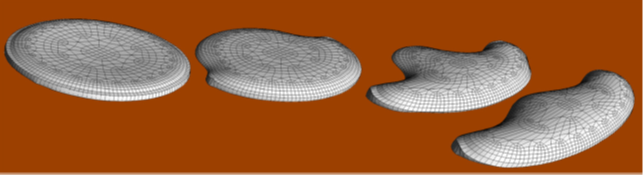

If cell shape changes could have been avoided in their modeling, the shape dynamics would have been irrelevant and they would not have simulated such characteristic shapes. If their assumptions on how cell shape links to the biochemical network were wrong, they would have simulated shapes that do not correspond to observations. 

So, it is important when building a model structure to think about the spatial support of the model, whether it can be considered as finite or infinite (depending on the length-scale of the phenomenon we are studying), and considered as fixed or moving (depending on the time-scale of the processes we are looking at).  As a general rule of thumb, cell shape changes are slow compared to biochemical reactions, and by the time the reaction network has reached an equilibrium, the cell shape has not changed a lot. So models that focus on finding a solution of the biochemical network can assume the physical boundaries of the network support are stable over time. But this is something to keep in mind - always. 

As an exercise, we encourage you to do a similar comparative work based on the models referred to in this more recent review on mathematical modeling of cell migration https://doi.org/10.1371/journal.pcbi.1008411. How different parts of the process are modeled? What are the questions addressed, and thus the chosen model objects, objects features and objects relationships? 

Now that we have looked at several models of cellular motion, and carefully thought about their ingredients, we are ready to think about another system from scratch.

Question 9: How would you mathematically model bacterial motion (just give the main model structure, including what you think is necessary)?


In [32]:
# %load solutionQuestion9.py


### Modeling in BigPharma: from drug delivery to organism-wide responses
To learn how to build predictive model structures, it is worth looking at what is done in translational biomedicine, where there is a strong pressure for efficient treatments and results. One interesting example comes from the field of drug delivery. To optimize treatments efficiency and reduce side-effects, drugs have to be delivered to their target with minimal absorption by off target tissues. In particular, chemotherapeutic drug penetration in tumors can be improved by nanotechnology-based drug delivery systems. Drug delivery nanotechnologies consist in enclosing drug molecules in specifically designed nanoparticles, whose physical properties are optimized to reach the target. This includes optimizing the nanoparticle shape, size, deformability, surface charge… etc (as a review, see https://dx.doi.org/10.1155%2F2020%2F5194780). 

To predict the influence of these parameters on particle penetration in tissues and cells, translational scientists have used a variety of mathematical models. 

For instance, models for diffusion of nanoparticles (yellow below) within a network of Extra-Cellular Matrix fibers (grey below) revealed that neutral charge facilitates motion within the ECM, regardless of the type of modeling for the ECM (electrostatic model: left, hydrodynamic model: right, from https://dx.doi.org/10.1016%2Fj.bpj.2010.06.016). 
Here, model objects are the nanoparticles and the ECM fibers, object features are the positions and electrical charges, and the relationships are electrostatic interactions (and/or hydrodynamic constraints):

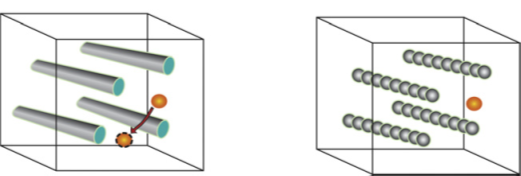

A similar mixed electrostatic/hydrodynamic model revealed that positively charged nanoparticles cross the tumor blood vessels more easily than negatively charged or neutral particles (https://dx.doi.org/10.1007%2Fs10439-012-0630-4). Hence, optimal particles for delivery to tumors should be initially cationic to target the tumor vessels and then change to neutral charge after exiting the blood vessels. Look how simple these models are, conceptually, as they target a very particular question. The objects are only the drug particle (a sphere), and ECM fibers; object features are (static) electric charges, and object position in the 3D space; relationship are the fundamental physics laws of hydrodynamics and electromagnetism. No biochemistry is described here. 


Once drug nanoparticles reached tumor cells, they still have to be taken up by cancer cells, but not by immune cells. Particle engulfment is generally achieved either by phagocytosis, an active process of the immune system, or receptor-mediated endocytosis that is performed by all cell types, both of which use slightly different biomolecular machineries to re-shape the cell membrane for engulfment. Here again, mathematical modeling proves useful: to study how the stiffness and elasticity of nanoparticles affect their internalization by cells, researchers simplified the problem by studying the adhesive wrapping of a soft elastic vesicle by a lipid membrane (see Figure below, from https://doi.org/10.1103/PhysRevLett.107.098101). Model objects: elementary patches of cell membrane and particle surface. Interactions between objects: mechanical forces (adhesion, surface forces ...)

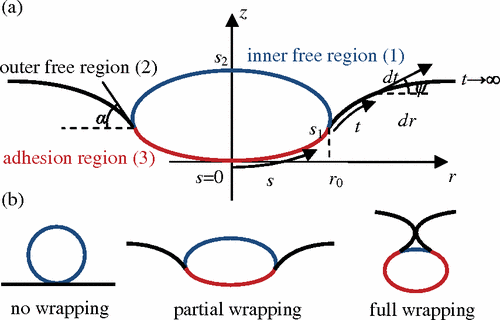

Here, because we are studying particle engulfment by the cell, the cell’s biochemistry has to be modeled. However, it is kept at a very phenomenological level, all the cell’s biochemistry being integrated to the “adhesive force” which is, indeed, the overall effect of signaling (to bind particle’s receptors to cell’s receptors). 

This study of the endocytosis of particles, that can be applied to drug delivery nanoparticles, revealed that complete wrapping, partial wrapping, or no wrapping at all could be achieved depending on the adhesion energy, surface tension of membrane, and bending rigidity ratio between vesicle and membrane. All these parameters depend on complex biochemical networks; yet, without the description of any molecular details, this model was able to clarify the conditions for complete wrapping. It was shown (including in further similar studies) in particular that nanoparticle elasticity was playing a key role to avoid macrophage uptake, while preserving receptor-mediated cancer cell uptake (https://doi.org/10.1126/sciadv.aaz4316). 

Further reading, on the influence of nanoparticle size and shape: 

https://doi.org/10.1186/1752-0509-4-149

https://doi.org/10.1002/adhm.201500441 

https://doi.org/10.1186/s12918-017-0491-4



The design of nanoparticles for drug delivery falls in the more general fields of drug pharmacokinetics (PK, how the body processes the drug), and in return, to a lesser extent, pharmacodynamics (PD, what the drug does to the body, overall). The purpose of these two research fields is to improve drug efficiency and reduce side-effects. This is particularly important in cancer treatment, where drug efficiency is quite limited, generally speaking, and side-effects are important. 
A range of mathematical models is used in the industry to improve PK and PD (see further reading). Since, in this Section, we are reviewing model structures, it is worth mentioning that modeling in industry also needs to be time- and money-efficient. Hence, various timelines, and also whether the question you are addressing is limited to one specific drug/application or generalizable to a number of pathways/diseases/targets, will generally dictate how detailed you model can be. 
As a consequence, PD/PK models can be anything from the fitting of drug dose-therapeutic effects curves with one single equation and 4 parameters (e.g., https://doi.org/10.3389/fphar.2014.00174), to Quantitative Systems Pharmacology (QSP) modeling of entire molecular pathways and their response to pharmacological perturbation (e.g. the dysregulation of cholesterol and sphingolipids, their relationship to Aβ aggregation in the brain in the context of Alzheimer’s disease (AD), and the relevance of using them as drug targets from https://doi.org/10.1002/psp4.12351).

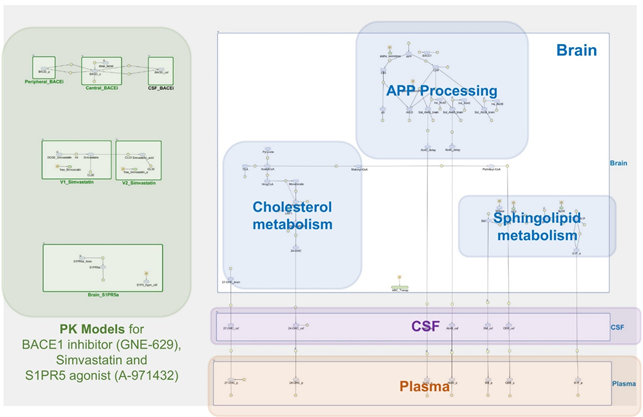

While the former only allows to adjust the drug concentration for optimal on-target effect and assess the variability between individuals (which is already something), the latter was able to reproduce the response of several AD biomarkers to existing pharmacological treatments, and to predict that targeting the sphingosine 1-phosphate receptor 5 (S1PR5, lipid signaling receptor) would be therapeutically relevant. However, for this to become possible, the model had to include three physiological compartments (plasma, cerebrospinal fluid, brain), through which several biomolecules (cholesterol/sphingolipid metabolism, amyloid precursor protein (APP) processing/metabolism, S1PR5 binding, and the relevant drug molecules) are interacting and transported.

Of note, implementing this model required a model of how/when each pharmacological intervention was translating into changes in free concentration of the administrated drugs in the blood and the brain, to couple pharmacological treatments to the modeled network response. This was achieved using published “1 equation 4 parameters”-like type of PK modeling, emphasizing the complementarity between multiple modeling approaches with very different granularities and purpose. 

Further reading, review on mathematical modeling in pharmaceutical industry:

https://doi.org/10.3389/fphar.2014.00174 (we declare no conflict of interest).


## B) Useful Tips to design the model structure 
So, there is a wide landscape of modeling approaches to choose from. Even though the molecular information available, the purpose of your model and the hypotheses you want to test will strongly constrain your model construction, there are some general useful rules of thumb or tips that will help you to predict the general behavior of a model, or at least parts of it, prior to a complete resolution. This will help you to adjust, simplify or complexify the model structure before embarking on a time-consuming coding exercise. 
### Common (topological) elements of model structure and their input vs output response: elementary notions of Network Logic
As we have seen so far, models can generally be described as networks of interacting objects/objects features (network nodes). Nodes and their interactions/relationships (edges) can have a lot of different meanings (e.g., protein A activates protein B, protein C catalyzes the synthesis of protein D, the phosphorylation level of protein E negatively affects the ubiquitination of protein E, lipid reservoir R increases production of vesicles of type T …. see (A)). But overall, edges can be classified as “positive” interactions, where the first node tends to increase the feature represented by the second node, and “negative” interactions, where the first node tends to “reduce” the second node. The mathematical details of how these positive and negative interactions translate into equations depend on the particular meaning of the nodes and edges, and would certainly affect quantitatively the plots displayed below. Indeed, the equations simulated are tied to a particular meaning of nodes and edges, but we’re not there yet, this will be described in the notebook Section 2 - Animating the structure. 
Yet, we can get insight on the model response just looking at how the different nodes are wired through positive (+1 coefficients along edges below) and negative (-1 coefficients) interactions. Let us first have a look to very commonly encountered chains of nodes/interactions, which we will term “elementary topological modules” of the network, and the kind of relationship between network input and output they yield to. 

#### <ins> 1) linear pathway </ins>
We assume some constant biological input continuously stimulates Node 1, which in turns stimulates Node 2. We plot the biological output as the value of Node 1 and Node 2 (vertical axis, dashed and solid lines respectively), as a function of time (horizontal axis). 

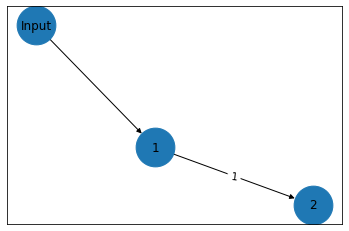

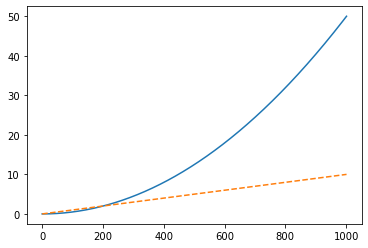

In [159]:
%run 1-linearPositive.py

We find an increase of both nodes with time in response to the input. This increase does not seem to be limited, and is stronger for node 2 than for node 1.

Now we assume that instead of promoting Node 2, Node 1 downregulates Node 2:

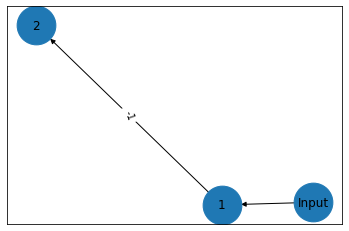

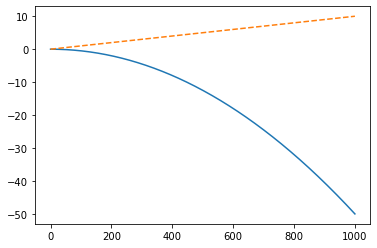

In [160]:
%run 1-linearNegative.py

The input is generally amplified if many nodes are along the linear pathway (see below, dashed = node 1, solid = node 4). Note that the extent to which input signal is amplified depends on the exact meaning of nodes and edges and the corresponding mathematical implementation of the network. 

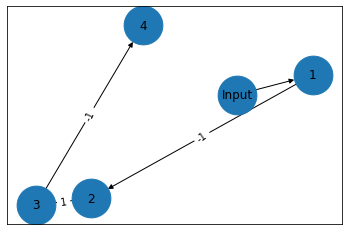

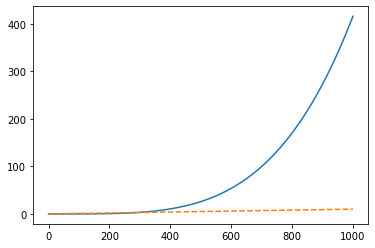

In [161]:
%run 1-linearLongPositive.py

Along such long linear cascades, 2 negative regulations end up as equivalent to 2 positive ones (below, node 1 negatively regulates node 2, and node 3 negatively regulates node 4).

In [163]:
%run 1-linearLongDoubleNegative.py

Exception: File `'1-linearLongDoubleNegative.py'` not found.

#### <ins> 2) Feedback </ins>
We talk about "Feedback" when the output (node 2) affects its own input (or anything upstream of its own input). Depending on whether this feedback regulation is positive or negative, we talk of "positive" or "negative" feedback. In the example below, we use the linearPositive pathway shown above and add a positive regulation of node 2 onto node 1 (note the double-headed arrow between nodes 1 and 2). This will generate a <b>"positive" feedback</b>. 

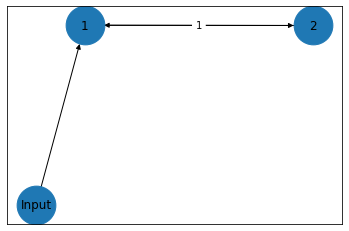

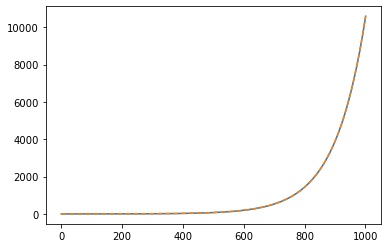

In [164]:
%run 2-feedbackPositive.py

In the presence of positive feedback, the amplification of both node 1 and node 2 in response to the input over time is much stronger and faster. Note (see below) that the response is very similar if the feedback happens between node 2 and the overall input, or even between node 1 and the input.

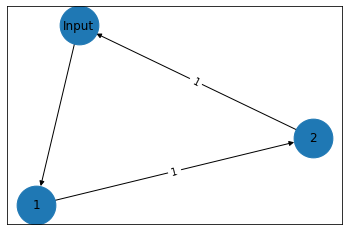

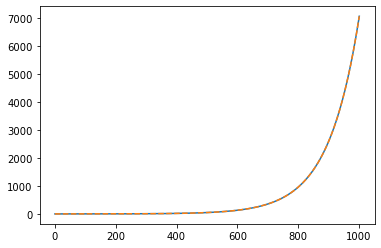

In [165]:
%run 2-feedbackPositive2.py

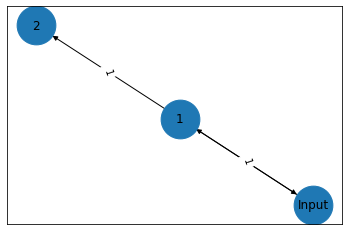

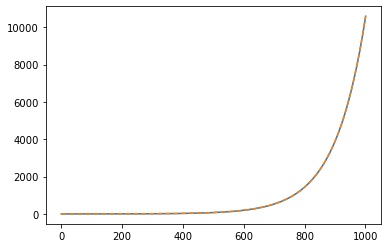

In [166]:
%run 2-feedbackPositive3.py

 Assume now that Node 2 negatively regulates Node 1, establishing a <b>"negative" feedback</b>:

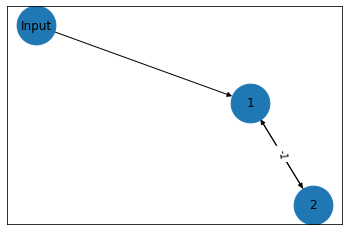

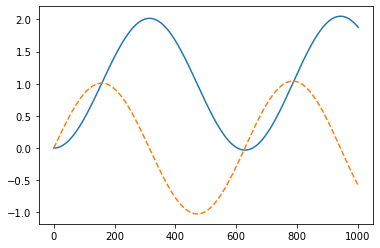

In [167]:
%run 2-feedbackNegative.py

Unlike for the linear pathway and the positive feedback elementary topological modules, here the output values of Node 1 and Node 2 are <b> bounded </b>. They do not grow indefinitely with time. In this particular case, both values oscillate in time. This is for instance the case of cell cycle proteins in real life. The amplitude of the fluctuation and how Node 1 and Node 2 are phased relative to each other depends on the mathematical expression of the feedback and on parameters. Importantly, the presence of negative feedback in the model is <b> necessary </b> to provided bounded solutions at infinite times, but it is not <b> sufficient </b>. Below, feeding back the output Node 2 to the overall input generates oscillations whose amplitude is amplified over time. 

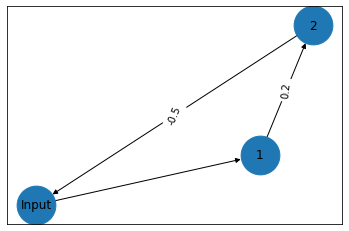

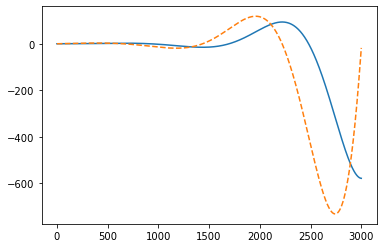

In [95]:
%run 2-feedbackNegative2.py

Similar to what we have seen in linear networks, the presence of 2 negative negative interactions between the same nodes (i.e., Node 1 negatively regulates Node 2 and vice-versa) is in fact equivalent to a positive feedback loop, with outputs diverging overtime. Only two "opposite" interactions will possibly lead to bounded outputs. 

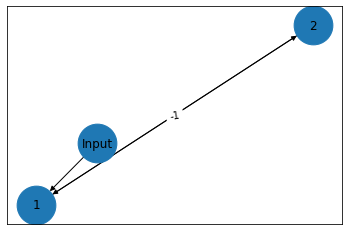

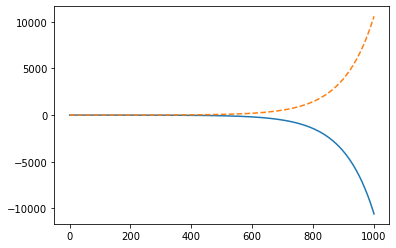

In [100]:
%run 2-feedbackFalseNegative.py

In this absence of such negative regulation somewhere in your model, model solutions will diverge over time. This does not happen in biology. Nothing grows up to infinity in biology, one explanation being Eistein's famous quote "there are only two infinite things: the universe and human stupidity; and I'm not sure about the universe". Hence, a model without negative regulation, where outputs grow indefinitely cannot explain a biological process on the long term, and must be supplemented by something that limits the growth of the outputs. Yet, exponential increase of a model quantity can be true for a limited amount of time, as for instance growth of a cell population growth in presence of unlimited resources.

#### <ins> 3) Feed forward </ins>
We refer to as feed forward loops elementary topological modules of a network where the same input affects two nodes that are also linearly connected. Below, let us look at an example of a <b> positive feed forward loop </b> where the input positively affects nodes 1 and 2, while node 1 also positively affects node 2. Whthout surprise, in the absence of any negative regulation, both Node values increase indefinitely over time. 

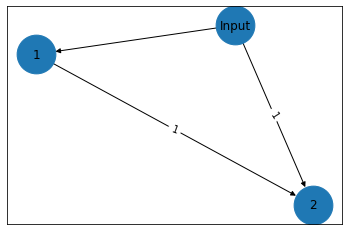

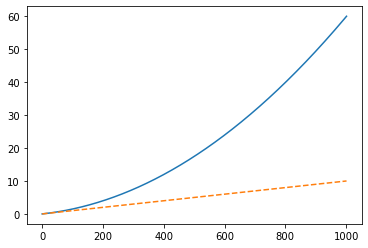

In [137]:
%run 3-feedforwardPositive.py

A similar output will be observed if the Input positively affect Node 1 and negatively affects Node 2, while the positive effect of Node 1 on Node 2 is preserved. 

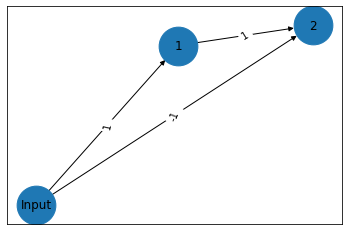

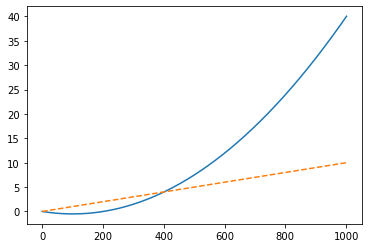

In [146]:
%run 3-feedforwardNegative.py

Indeed, in this pathways there are 2 ways through which the Input affects Node 2: either directly (negative effect), or through Node 1 (positive effect). Both ways do not "interact" with each other, in the sense that the amount of Node 2 produced by the first pathway does not affect the amount of Node 2 produced by the second one. Hence, the total Node 2 is the net sum of both, and since both are not regulated by any kind of negative feedback, growth to infinity is indefinite. 

But this is completely different if there is a (positive) feedback between Node 1 and Node 2:

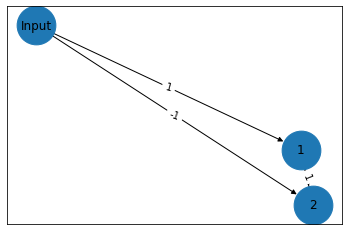

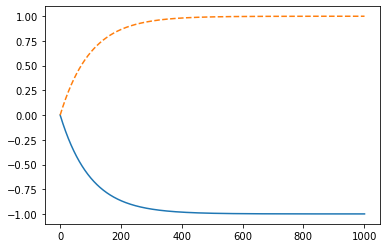

In [157]:
%run 3-feedforwardNegative&FB.py

In this situation, because of the positive feedback between Node 1 and Node 2, any increase in Node 1 tends to increase Node 2 and any decrease in Node 1 tends to decrease Node 2 and vice versa. So both would tend to "diverge" (see examples above in 2) Feed back). But because the Input affects positively Node 1 but negatively Node 2, the Input has contradictory effects on the feedback loop and hence it tends to force an equilibrium. Overtime, the values of Node 1 and Node 2 reach a plateau. This particular regime is sensitive to the parameters, and changing the relative weights of the different parameters will generate different response regimes, as we'll study in more details in the Section 2 - Animating the structure notebook. 

But the bottom line is: negative feed forward combined with positive feedback generates an effective overall "negative feedback" effect that has the potential to generate bounded outputs. This is also true if the positive feedbak arises from two negative interactions, in which case bounded outputs require positive feed forward. 

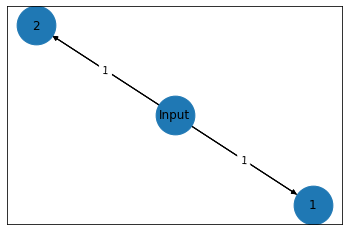

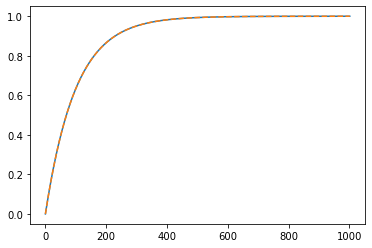

In [158]:
%run 3-feedforwardNegative&FB2.py

<b> We stress that drawing cartoon network-like schematics of a preliminary model, and trying to identify core topological modules such as those listed above will provide insight on the possible dynamical response of the model, and guide model adjustments if necessary. </b>

### Flexible network to play with: let's simulate the time evolution of a more complex network to "test" the topological elements
The code below generates a network, by defining its nodes, edges, and the weight of the edges (which will represent, in the simulated time evolution of the model, the "strength" of the interaction). Then, the next cell displays the network and its representative matrix (the weighted adjacency matrix), and finally the third piece of codes runs a basic ODE model on this network structure. The notebook "animating the structure" will teach you how to develop ODEs (ordinary differential equations), and at this stage you do not need to understand or think about what the code in the third cell represents. Just identify core elements similar to the ones discussed above in the network, play with them, look at the graphic output of the "node values" (which could be, for instance, gene expression levels) over time, and get an understanding of how the network structure (and possibly also some of its parameters) influence the model output!

In [119]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
# we generate an empty graph
G = nx.DiGraph()
# we add 8 nodes with labels 1,2,3 ... 8, edges connecting them, and we give weights to each edge
G.add_nodes_from([1,2,3,4,5,6,7,8]),
G.add_edge(1,2,weight=5)
G.add_edge(1,5,weight=1)
G.add_edge(7,4,weight=-1)
G.add_edge(2,7,weight=-1)
G.add_edge(8,1,weight=-1)
G.add_edge(1,1,weight=-1)
G.add_edge(3,3,weight=-1)
G.add_edge(3,4,weight=1)
G.add_edge(4,7,weight=1)
G.add_edge(6,2,weight=1)
G.add_edge(5,6,weight=1)



    

Feel free to add/remove nodes or edges or modify the edge weights, i.e. the strength of the interactions, by directly editing the code in the cell above. positive weights: positive interaction, negative weights: negative interactions.  
Don't forget to re-run the previous cell to generate the new network, update the weight values, and check below if the network and the weighted adjacency matrix are the one you intended to create!
Note: nodes/edges can be added/removed by adding the commands e.g. G.add_node(9), G.remove_node(4), G.remove_edge(1,2) ... etc in the free space above. Re-run the cell and check below the result.  

[[-1  5  0  0  1  0  0  0]
 [ 0  0  0  0  0  0 -1  0]
 [ 0  0 -1  1  0  0  0  0]
 [ 0  0  0  0  0  0  1  0]
 [ 0  0  0  0  0  1  0  0]
 [ 0  1  0  0  0  0  0  0]
 [ 0  0  0 -1  0  0  0  0]
 [-1  0  0  0  0  0  0  0]]


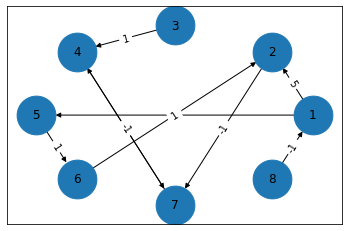

In [120]:
# we display the graph, with the "shell" layout that shows all nodes along a circle and edges in the middle
pos = nx.shell_layout(G)
edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx(G,pos,node_size=1500, with_labels=True)
# compute the adjacency matrix of the network (and check it!)
A_matrix = nx.adjacency_matrix(G, nodelist=None)
print(A_matrix.todense())


[ 4.27395349e-05  4.60397436e+01  0.00000000e+00  4.79538814e+01
  9.99957260e-01  9.01004274e+00 -9.60237390e+00  0.00000000e+00]


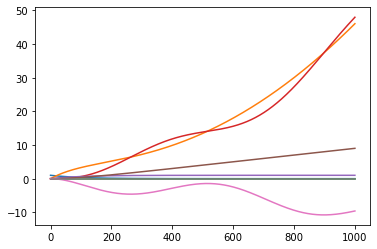

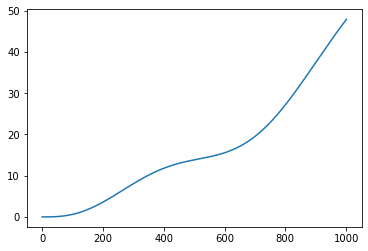

In [123]:
# evolve the system overtime from these network interactions: 
# initial state: a=1, others are all 0
timemax = 10
delta_state = [0] * len(G)
initial_state = [1]
initial_state = initial_state + [0] * (len(G) - 1)
current_state = initial_state
aggregated_state = np.array(current_state)
time_step = 0.01
time = 0
while (time<timemax):
    time = time + time_step
    for i in range(0,len(G)):
        delta_state[i] = 0
        for k in range(0,len(G)):
            delta_state[i] = delta_state[i] + A_matrix[k,i] * current_state[k]
    for i in range(0,len(G)):
        current_state[i] = current_state[i] + delta_state[i] * time_step
    aggregated_state=np.c_[aggregated_state,current_state]
final_state = aggregated_state[:,-1]
print(final_state)
# plot the time variations of all the node values; 

plt.figure()
for i in range(len(G)):
    plt.plot(aggregated_state[i])
plt.show()
# in order to show the plot for only one node like node 4 here, use
plt.figure()
plt.plot(aggregated_state[3])
plt.show()
# Remember the first not has index "0"

Further reading on elementary topological motifs in networks:

https://doi.org/10.1126/science.298.5594.824

### Correcting model architecture: the example of Drosophila embryo development 
The body of the Drosophila melanogaster fruitfly is made of segments, within which cell are different owing to distinct programs of gene expression, stable over time. This segmentation of the Drosophila body happens early in development, when a striped pattern of bands made of qualitatively different cells form, perpendicular to the anterior-posterior axis. The purpose of this short section is not to discuss the details of the molecular interactions in this extremely important model for vertebrates development, but rather to get a glimpse of the crucial difference between adjusting model parameters, and adjusting the model structure. 
20 years ago, von Dassow and co-authors published a mathematical model of the molecular interaction network that governs cell patterning in the Drosophila embryo (see https://doi.org/10.1038/35018085). The initial model was based on the molecular interactions known at this time, shown as solid lines on the Figure below, between 5 development genes: wingless (WG), engrailed (EN), hedgehog (HH), cubitus interruptus (CID: whole protein; CN, repressor fragment), and patched (PTC).

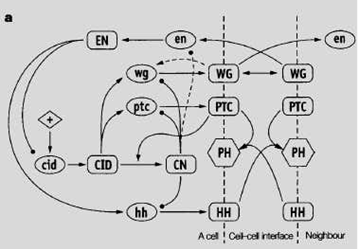

 
On this network, PH refers to the patched–hedgehog complex, ellipses refer to mRNAs and rectangles to proteins, and arrows and circles represent positive and negative interactions respectively. 
They modeled this network in adjacent layers of cells, including the cell-cell interface. This is another example of a multi-scale model. Because their model included more than 50 parameters, most of which were unknown, they started asking the very simple question: is there any parameter set that produces the striped patterns of WG, EN, HH, CI and PTC gene expression observed in Drosophila embryo, stably over time? 

The answer was no. Thousands of parameter sets spanning orders of magnitude yielded a network response that was very sensitive to subtle variations in protein concentrations in the initial state. Because such fluctuations in gene expression are ubiquitous to all cellular systems, the network shown above including only the solid lines was pretty inconsistent with the reproducibility of Drosophila segmentation across individual flies. Thus, in this example, the inability of the model to reproduce experimental observation was not a problem of parameter choice, but rather of model structure. 
Indeed, when the authors modified the model structure by adding the two interactions that establish positive feedback loops in WG and EN expression (dashed lines), the resulting model was correctly predicting the stripe patterns robustly over broad ranges of parameters. 

It was shown later that this model was not able to predict the long-term maintenance of the segments pattern over successive cell division, calling for modifications. Nicholas Ingolia showed that the CN ----| en   interaction that establishes an effective feedback between EN and CI expression in the von Dassow model is not the only one which brings robustness to the network. Indeed, other EN-dependent feedback interactions provide similar robustness (https://dx.doi.org/10.1371%2Fjournal.pbio.0020123). 

This example teaches us two important lessons: 1) adding unknown relationships between objects to obtain a model structure that explains observations has the potential to guide experimental research (e.g., proving the “guessed” relationships and give them a molecular basis); and 2) explaining experimental observations can require global underlying network properties that can be achieved by multiple choices of molecular interactions (as for the Drosophila network). Hence, we need to be at least as cautious as von Dassow et al. when claiming that a given model “predicts” a molecular interaction. 


### Advanced tools to design/improve/simplify the model structure
Once a first version of a model is designed, it can be useful to perform a preliminary analysis of the model behavior prior to full resolution, especially if the network representing the model is complex. In the section “Common (topological) elements of model structure …”, we have seen some common topological modules whose behavior can be predicted without too much effort. However, often these elementary structures are intertwined and then, even the preliminary analysis requires specific tools. 
Such tools include Topological analysis, control logic, reverse engineering… We encourage you to navigate the web for additional information on these techniques. Network analysis techniques might also be found in the “D network analysis” section of this CBM course.

One important class of (preliminary) network analysis methods comes from the mysterious world of binary logic. Indeed, as discussed earlier in this lecture, biological variables do not indefinitely increase, or decrease. They always end up saturating due to some negative regulation. Even if they do not saturate on the time-scale of an experiment or modeling, often there is some threshold level of activation or expression (or anything else) above which the biological variable can activate (or express, or anything else) its downstream effectors. Thus, (very) roughly speaking any biological variable (or node within a model network) can be represented as a binary variable. 0: variable is off, 1: variable is on. In both cases, the network links downstream are active, and “positive regulation” links will transmit the value of the variable to the downstream variable, while “negative regulation” links will transmit the other value. In a gene regulatory network, for instance - and this is the best example one can find -, if gene A activates the transcription of gene B, then inactive A will yield inactive B and active A will yield active B. In contrast, if gene A represses gene B, the logic is reverted: inactive A will yield active B, and conversely. 

This is well represented, for some usual biomolecular interactions, on the following Figure (from https://dx.doi.org/10.1039%2Fc2ib20193c).

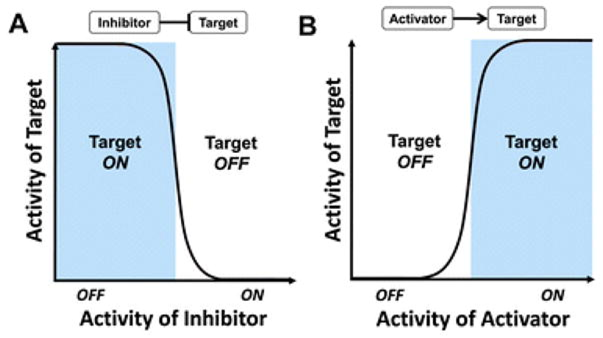

Similar sigmoid-like curves are obtained when looking at biochemical reaction rates as a function of substrate concentration, including for complex formation …etc. Then, at very first sight, with the exception of a short time during which the model transits between different states, we can assume that the node values in the network ore ones or zeros “on the long term”. The “long term” is defined by the limiting rates of the actual biochemical reactions, and the faster those rates, the sooner you have reached the “long term” regime. 

Within this Boolean approximation where network nodes values are 1s or 0s, and network links/interactions are changing 1s in 0s and conversely (negative interactions), or conserving the values (positive interactions), we can construct a table of all the possible combinations of node values (see https://dx.doi.org/10.1039%2Fc2ib20193c Figure 4 for instance). 
And this approach might prove useful to simplify the network: two nodes A and B that share the same value regardless of the states of the other nodes might be considered just as one single node. This is especially true if there exist a linear path between A and B along the network that is governed only by fast kinetic rates: in this case, even taking into account the full network dynamics, the state of node A would be acquired very fast by node B with little perturbation on the slower, rate limiting steps of the rest of the network. In the simplified network, all interactions that involve either A or B in the original network are conserved for the “merged” node. This is how we proceeded when simplifying the glucose repression pathway at the beginning of this section. 

For the network parts that couldn’t be simplified based on Boolean logic, or based on reasonable assumptions on subnetwork compartments, time-scales…, a full mathematical framework is required for dynamical modeling. And this is what we will learn now, in Section 2: animating the structure. 



### Conclusion
Models are often classified as ‘bottom-up’ or ‘top-down’ (see https://doi.org/10.1038/nrg2098 box 2). The former build up on molecular details to predict the functional behavior of the system, while the latter are based on global functional properties and try to infer constraints on the molecular interactions to satisfy these properties. Generally speaking, the former encompass large, well-defined molecular networks with many parameters while the latter is striped down and most often oversimplified. As demonstrated in the examples above, successful models often include both ‘bottom-up’ and ‘top-down’ strategies for different parts of the model structure, and we believe that a model should not fall into any particular category or framework. Be creative!

Even if you do not wish to design mathematical models autonomously, at this stage you are able to choose model ingredients, contribute to the design of the model structure, and to some extent “guess” which model interactions are important for the modeling of your favorite biological process. This knowledge will be important to communicate and collaborate with mathematical modelers (see notebook Section 7: Communicating around models: collaborative skills development). 
If you are willing to learn more and become able to mathematically formalize the model, and eventually solve it, please go to Section 2: Animating the structure - time- and space- dependent modeling. 

Further reading:

On model design strategies (in the development field, but broadly applicable): https://doi.org/10.1038/nrg2098. 
